# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: https://www.kaggle.com/datasets/shankarpriya2913/crop-and-soil-dataset?select=data_core.csv
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: 8000
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import kagglehub
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here
dataset_path = kagglehub.dataset_download("shankarpriya2913/crop-and-soil-dataset")
csv_file_path = f"{dataset_path}/data_core.csv"
df = pd.read_csv(csv_file_path)
df.head()

100%|██████████| 107k/107k [00:00<00:00, 51.4MB/s]

Extracting files...


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan info baris dan kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [4]:
# Menampilkan jenis data di setiap kolom
df.dtypes

,0
Temparature,float64
Humidity,float64
Moisture,float64
Soil Type,object
Crop Type,object
Nitrogen,int64
Potassium,int64
Phosphorous,int64
Fertilizer Name,object


In [5]:
# Menampilkan data yang hilang
df.isna().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [6]:
# Menampilkan analisis deskriptif
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


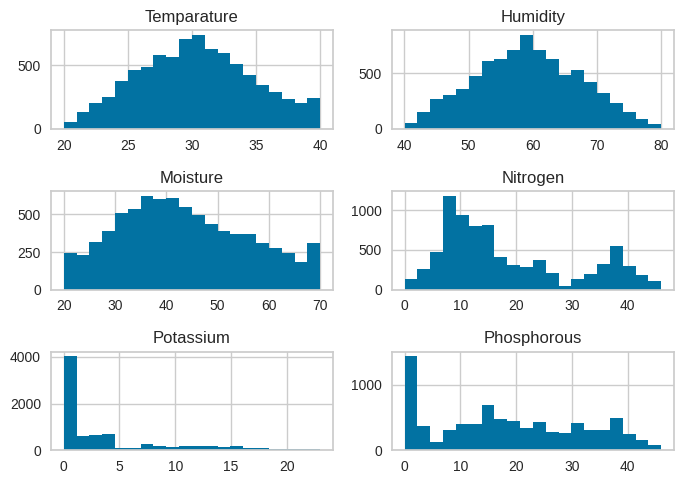

In [7]:
# visualisasi distribusi data numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
df.hist(column=numeric_columns, bins=20, figsize=(7, 5))
plt.tight_layout()
plt.show()

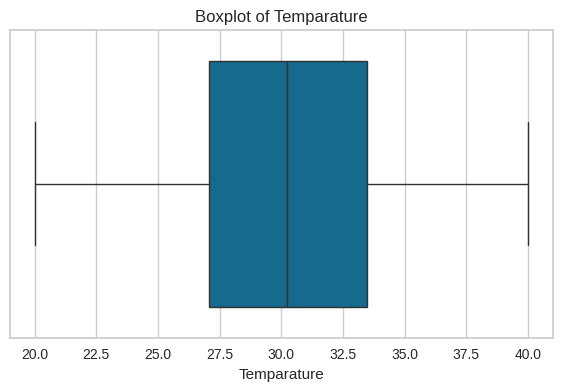

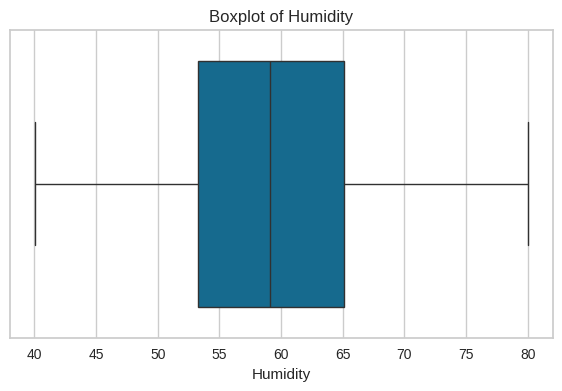

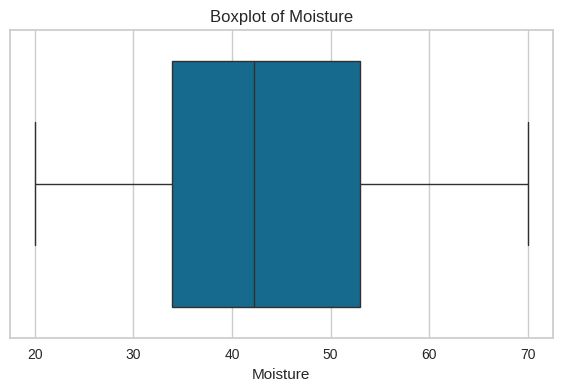

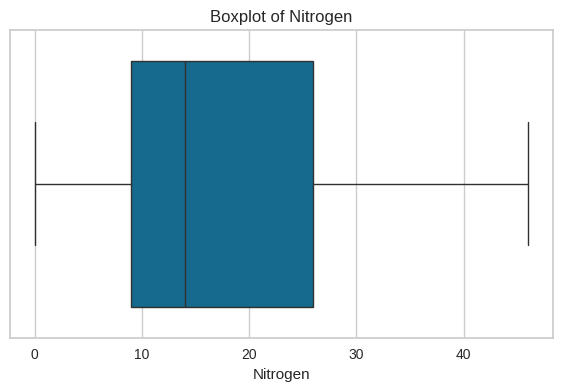

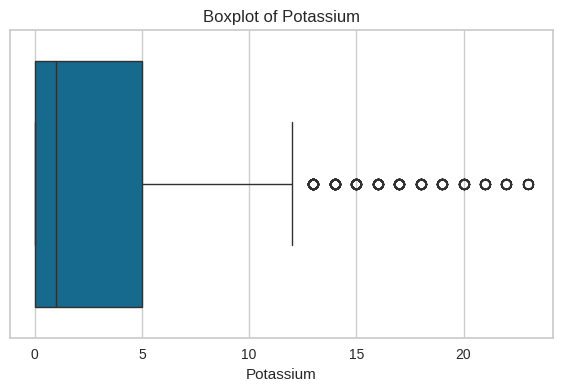

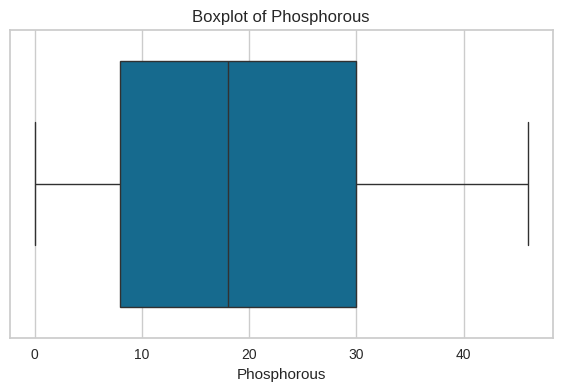

In [8]:
# Mengidentifikasi outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
for feature in numeric_columns:
  plt.figure(figsize=(7, 4))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

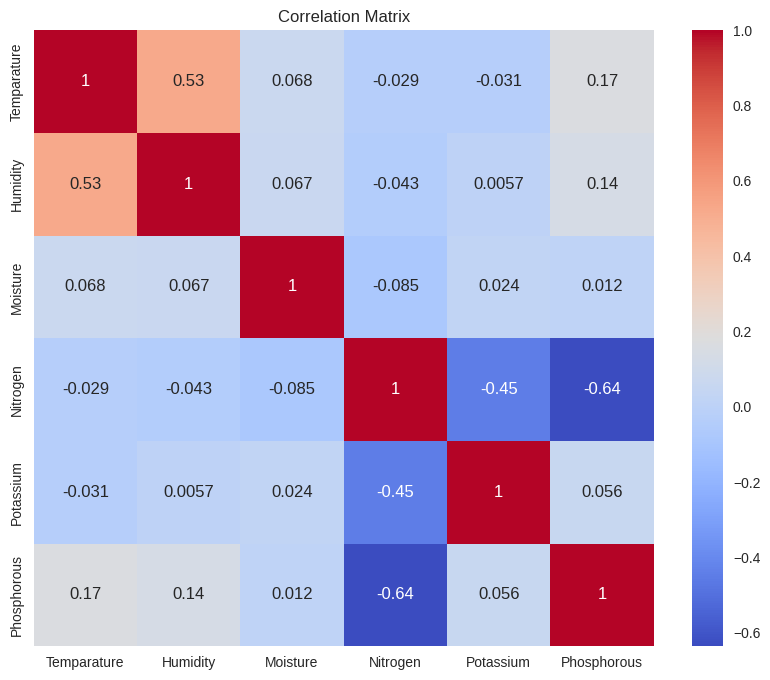

In [9]:
# Matriks korelasi variabel numerik
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-10-52b30221c295>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="coolwarm")


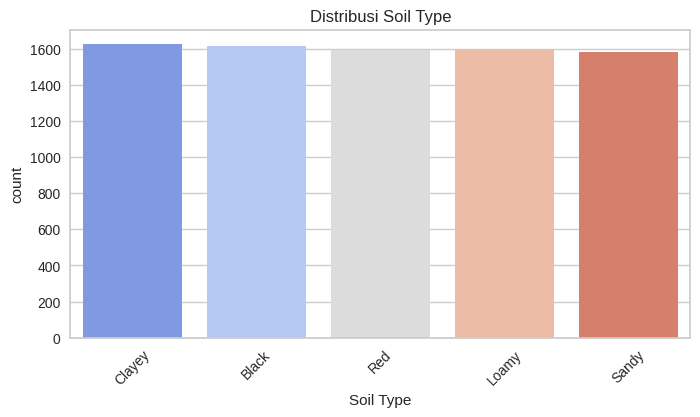

<ipython-input-10-52b30221c295>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="coolwarm")


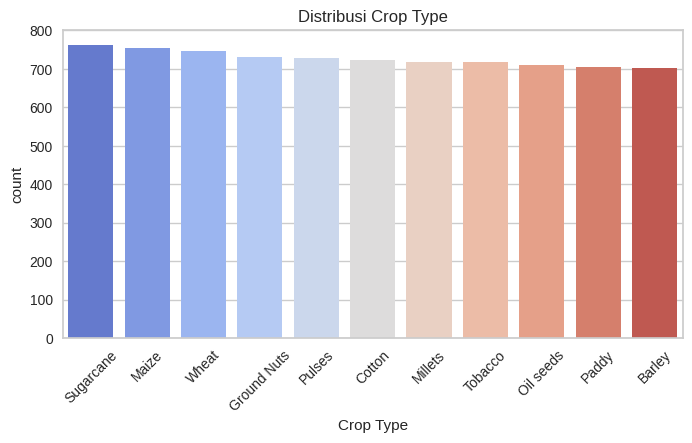

<ipython-input-10-52b30221c295>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="coolwarm")


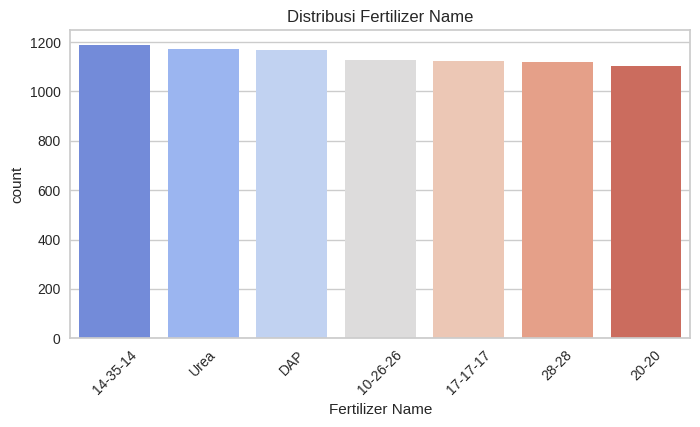

In [10]:
# Menampilkan visualisasi data kategorik
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col}")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
# menghapus outlier dengan patokan Q1 dan Q3
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# mengumpulkan data yang tidak memiliki outlier
condition = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_columns]

# menampilkan dataset yang telah dibersihkan
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

# memastikan outlier sudah tidak ada
OutliersRemain = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
print(OutliersRemain.sum())

0


In [13]:
# menampilkan kolom kategorik
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features]

,Soil Type,Crop Type,Fertilizer Name
0,Sandy,Maize,Urea
1,Loamy,Sugarcane,DAP
2,Black,Cotton,14-35-14
3,Red,Tobacco,28-28
4,Clayey,Paddy,Urea
...,...,...,...
7994,Clayey,Oil seeds,14-35-14
7996,Black,Barley,10-26-26
7997,Red,Barley,Urea
7998,Black,Tobacco,DAP


In [14]:
# menggunakan one hot encoding *data tidak memiliki urutan tertentu
df_encoding = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoding

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_14-35-14,Fertilizer Name_17-17-17,Fertilizer Name_20-20,Fertilizer Name_28-28,Fertilizer Name_DAP,Fertilizer Name_Urea
0,26.00,52.00,38.00,37,0,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,29.00,52.00,45.00,12,0,36,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,34.00,65.00,62.00,7,9,30,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,32.00,62.00,34.00,22,0,20,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,28.00,54.00,46.00,35,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,36.43,71.29,30.73,15,3,14,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7996,39.39,71.67,49.34,35,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7997,35.79,67.64,45.04,41,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
7998,37.78,73.38,36.03,10,3,30,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [15]:
df_encoding.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat', 'Fertilizer Name_14-35-14',
       'Fertilizer Name_17-17-17', 'Fertilizer Name_20-20',
       'Fertilizer Name_28-28', 'Fertilizer Name_DAP', 'Fertilizer Name_Urea'],
      dtype='object')

In [16]:
# memilih fitur untuk clustering
selected_features = ['Temparature', 'Humidity', 'Moisture', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy']

df_selected = df_encoding[selected_features]
df_selected

,Temparature,Humidity,Moisture,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
0,26.00,52.00,38.00,False,False,False,True
1,29.00,52.00,45.00,False,True,False,False
2,34.00,65.00,62.00,False,False,False,False
3,32.00,62.00,34.00,False,False,True,False
4,28.00,54.00,46.00,True,False,False,False
...,...,...,...,...,...,...,...
7994,36.43,71.29,30.73,True,False,False,False
7996,39.39,71.67,49.34,False,False,False,False
7997,35.79,67.64,45.04,False,False,True,False
7998,37.78,73.38,36.03,False,False,False,False


In [17]:
Selected_numeric_columns = ['Temparature', 'Humidity', 'Moisture']
scaler = MinMaxScaler()
df_selected[Selected_numeric_columns] = scaler.fit_transform(df_selected[Selected_numeric_columns])
df_selected

<ipython-input-17-da44dbb9946b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[Selected_numeric_columns] = scaler.fit_transform(df_selected[Selected_numeric_columns])


,Temparature,Humidity,Moisture,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
0,0.298948,0.298773,0.3600,False,False,False,True
1,0.449174,0.298773,0.5000,False,True,False,False
2,0.699549,0.624343,0.8400,False,False,False,False
3,0.599399,0.549211,0.2800,False,False,True,False
4,0.399099,0.348861,0.5200,True,False,False,False
...,...,...,...,...,...,...,...
7994,0.821232,0.781868,0.2146,True,False,False,False
7996,0.969454,0.791385,0.5868,False,False,False,False
7997,0.789184,0.690458,0.5008,False,False,True,False
7998,0.888833,0.834210,0.3206,False,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

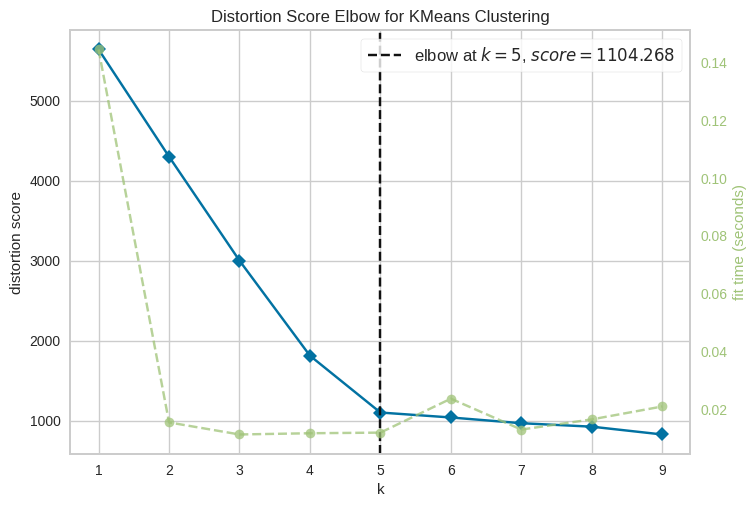

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [19]:
# membuat model kmeans
k_optimal = 5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(df_selected)
labels = kmeans.labels_

## **b. Evaluasi Model Clustering**


Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

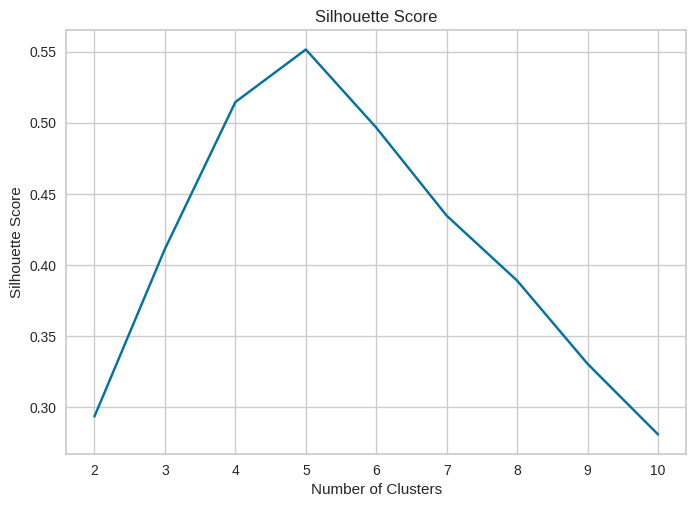

In [20]:
# Menggunakan Silhouette Score untuk mengevaluasi kualitas cluster
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_selected)
    silhouette_scores.append(silhouette_score(df_selected, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

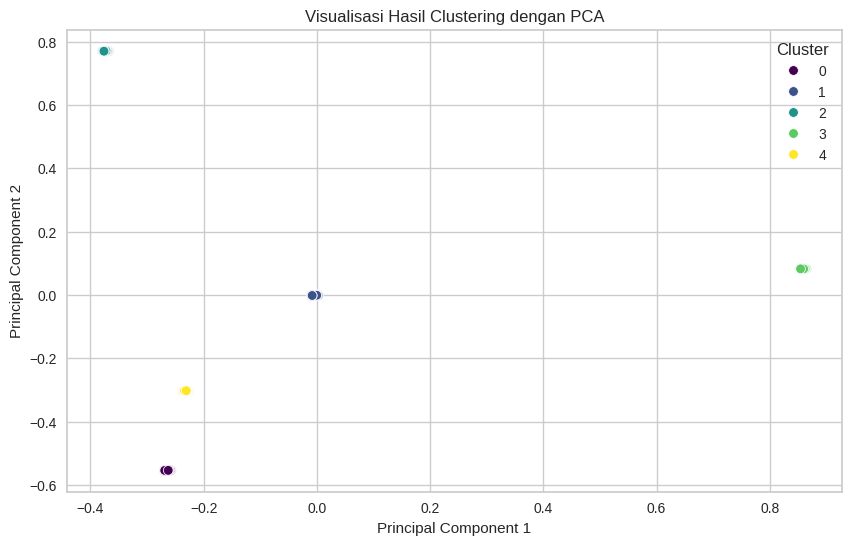

In [21]:
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_selected)

df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_pca)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
 # menambahkan hasil label cluster ke dataframe
df_selected['Cluster'] = labels


<ipython-input-22-13cb45a97b55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = labels


In [23]:
one_hot_columns = ['Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red', 'Soil Type_Sandy']

# Kembalikan ke format asli dengan idxmax()
df_selected['Soil Type'] = df_selected[one_hot_columns].idxmax(axis=1).str.replace('Soil Type_', '')

# menghapus kolom one hot encoder
df_selected.drop(columns=one_hot_columns, inplace=True)


<ipython-input-23-ba0572a3818b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Soil Type'] = df_selected[one_hot_columns].idxmax(axis=1).str.replace('Soil Type_', '')
<ipython-input-23-ba0572a3818b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns=one_hot_columns, inplace=True)


In [24]:
df['Soil Type'] = df_selected['Soil Type']


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [25]:
# Kolom numerik yang dinormalisasi
numeric_columns = ['Temparature', 'Humidity', 'Moisture']

scaler = MinMaxScaler()
scaler.fit(df[numeric_columns])
df_selected[numeric_columns] = scaler.inverse_transform(df_selected[numeric_columns])


<ipython-input-25-159340cb25b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numeric_columns] = scaler.inverse_transform(df_selected[numeric_columns])


In [26]:
df_selected.head()

,Temparature,Humidity,Moisture,Cluster,Soil Type
0,26.0,52.0,38.0,4,Sandy
1,29.0,52.0,45.0,0,Loamy
2,34.0,65.0,62.0,1,Clayey
3,32.0,62.0,34.0,2,Red
4,28.0,54.0,46.0,3,Clayey


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [27]:
# analisis hasil clustering
cluster_analysis = df_selected.groupby('Cluster').agg({
    'Temparature': 'mean',
    'Humidity': 'mean',
    'Moisture': 'mean',
    'Soil Type': lambda x: x.mode()[0]
})
print(cluster_analysis)

         Temparature   Humidity   Moisture Soil Type
Cluster                                             
0          30.417509  59.213023  43.424173     Loamy
1          30.374059  59.245646  43.481692    Clayey
2          30.479739  59.237223  43.578191       Red
3          30.334638  59.233691  43.785780    Clayey
4          30.558933  59.402859  44.063954     Sandy


Tulis hasil interpretasinya di sini.
1. Cluster 0: memiliki nilai temperature 30.41, humidity 59,21 dan moisture 43,42 dengan tipe tanah loamy.
2. Cluster 1: memiliki nilai temperature 30.37 , humidiy 59.24, dan moisture 43.48 dengan tipe tanah clayey
3. Cluster 2: memiliki nilai temperature 30.37, humidiy 59.23, dan moisture 43.57 dengan tipe tanah Red
4. Cluster 3: memiliki nilai temperature 30.33, humidiy 59.233, dan moisture 0.475 dengan tipe tanah clayey
5. Cluster 4: memiliki nilai temperature 30.55, humidiy 59.40, dan moisture44.06 dengan tipe tanah sandy.

Perbedaan mencolok yang terlihat antar kluster hanya pada tipe tanah.



# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
df_selected.to_csv("hasil_clustering.csv", index=False)
